# Introduction to SciKit-Learn (Sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting data ready
2. Choosing right estimator/algorithm for our problems
3. Fit the model/algorithm use it to make predictions on our dara
4. Evaluating a model 
5. Improve the model
6. Save and load a trained model 
7. Putting it all togather!

## 0. An end-to-end Scikit-Learn workflow 

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Get the data ready
import pandas as pd

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# this for ignore warningd
# import warnings
# warnings.filterwarnings("ignore") # if you want warnings then write default instead of ignore

In [6]:
# to check version 
# import sklearn
# sklearn.show_versions()

In [7]:
# Create x (features matrix)
x = heart_disease.drop("target", axis = 1)

# Create y label

y = heart_disease["target"] 



In [9]:
#2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

# we'll keep the default the hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [11]:
clf.fit(x_train, y_train);

In [196]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3


In [197]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [198]:
y_test

282    0
158    1
122    1
235    0
267    0
      ..
19     1
227    0
171    0
181    0
164    1
Name: target, Length: 61, dtype: int64

In [199]:
# 4. Evaluate the model on the training data and test data 
clf.score(x_train, y_train)


1.0

In [200]:
clf.score(x_test, y_test)

0.8032786885245902

In [201]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [202]:
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 5, 29]], dtype=int64)

In [203]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [204]:
# 5. Improve a model 
# Try different amount of n_estimators
np.random.seed(42)

for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators..')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f'Mode accuracy on tewt set: {clf.score(x_test, y_test)*100:.2f}% ')
    print('')

Trying model with 10 estimators..
Mode accuracy on tewt set: 83.61% 

Trying model with 20 estimators..
Mode accuracy on tewt set: 83.61% 

Trying model with 30 estimators..
Mode accuracy on tewt set: 81.97% 

Trying model with 40 estimators..
Mode accuracy on tewt set: 85.25% 

Trying model with 50 estimators..
Mode accuracy on tewt set: 80.33% 

Trying model with 60 estimators..
Mode accuracy on tewt set: 83.61% 

Trying model with 70 estimators..
Mode accuracy on tewt set: 81.97% 

Trying model with 80 estimators..
Mode accuracy on tewt set: 83.61% 

Trying model with 90 estimators..
Mode accuracy on tewt set: 83.61% 



In [205]:
# 6. Save a model and load it 
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [206]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8360655737704918

## 1. Getting our data ready to be used with machine learning
    
Three main things we have to do:
    
    1. Split the data into features and labels (usually 'x' & 'y')
    2. Filling (also called impi=urting) or disregarding missing values
    3. Converting non-numerical values to numeric values(also called feature encoding)

In [207]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [208]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [209]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [210]:
# Split the data into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [211]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [212]:
x.shape[0] * .8

242.4

In [213]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical 

In [214]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [215]:
len(car_sales)

1000

In [216]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [217]:
# split into x/y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [218]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [219]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [220]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [221]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [222]:
# Let's refit the model

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [223]:
model.score(x_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data alltogether.

In [224]:
# Import car sales missing data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [225]:
# To check how much missing values in each columns

car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [226]:
# Create x and y

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [227]:
# Lets's try and convert our data to numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [228]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option:1 Fill missing data with pandas

In [229]:
# Fill the Make column
car_sales_missing["Make"].fillna("Missing", inplace=True)

# Fill the colour column
car_sales_missing["Colour"].fillna("Missing", inplace = True)

# Fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [230]:
# Check our data frame again

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [231]:
# Remove rows with missing price value

car_sales_missing.dropna(inplace=True)

In [232]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [233]:
len(car_sales_missing)
# Here we have loos 50 data for missing price value

950

In [234]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [235]:
# Lets's try and convert our data to numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option: 2 Fill missing values with Scikit-Learn

In [236]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [237]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [238]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [239]:
# Split into x and y

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [240]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'Missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
numerical_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
numerical_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("numerical_imputer", numerical_imputer, numerical_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [241]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Colour","Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [242]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [243]:
# Lets's try and convert our data to numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [244]:
# Now we've got our data as numbers and filled (no missing data)
# Let's fit the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

## Choosing the roght estimator/algorithm for your problem

Note:
    
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

if you're working on a machine learning problem and looking ot use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use California housing dataset.

In [245]:
# Get california Housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [246]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [247]:
housing_df["Target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [248]:
# import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"] # median house price in $00,000s

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.5758549611440127

In [249]:
# Trying another model to get higher rate.

# import algorithm/estimator
from sklearn.linear_model import Lasso

# Setup random seed
np.random.seed(24)

# create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"] # median house price in $00,000s

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Lasso()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.2892789228810212

In [250]:
# Import the RandomForestRegressor model class from the ensemble model
from sklearn.ensemble import RandomForestRegressor

# set random seed
np.random.seed(32)

# create the data
x = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# create RandomForest model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.8109072310545229

## 2.2 Choosing an estiamtor for a classification problem

check the sklearn map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [251]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try `LinearSVC`.

In [252]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(17)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6721311475409836

In [253]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [254]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Classifire
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifire
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:
    
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [255]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data 

Diffrent names for :
* `x` = features, features variables, data
* `y` = labels, targets, target variables

In [256]:
# ignore these
df1 = pd.read_csv("data/test.csv")

In [257]:
# ignore these
x = df1.drop("target", axis = 1)
y = df1['target']

In [258]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
# x = heart_disease.drop("target", axis = 1)
# y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Classifire
clf = RandomForestClassifier()

# Fit the model the data (Training the machine learning model)
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifire (Use the patterns the model has learned)
clf.score(x_test, y_test)

1.0

In [259]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Classifire
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifire
clf.score(x_test, y_test)

0.8524590163934426

### 3.2 Make-predictions using a machine learning model

2 ways to predictions:

1. `predict()`
2. `predict_proba()`

In [260]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [261]:
# Use a trained model to make predictions

# it will accept 2d array 

clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [262]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [263]:
# Compare predictions to truth labels to evalute the model

y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [264]:
clf.score(x_test, y_test)

0.8524590163934426

In [265]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [266]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [267]:
# Let's predict() on the same data...
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also used for regression models.

In [268]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [269]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(x_train, y_train)

# Make Predictions
y_preds = model.predict(x_test)

In [270]:
y_preds[:10]

array([0.49909  , 0.74815  , 4.9334564, 2.56978  , 2.3469   , 1.6729601,
       2.30151  , 1.66775  , 2.52649  , 4.8600979])

In [271]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [272]:
# Compare the predictions with the original data
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32672061405038777

## 4. Evaluating a machine learning model

Three ways to evalute Scikit_Learn models/estimators:

    1. Estimator's buils-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions.
    
more about it: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score()` method

In [273]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and Y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Create train and test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Create classifier model instance
model = RandomForestClassifier()

# Fit the classifier to training data
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8524590163934426

In [274]:
model.score(x_train, y_train)

1.0

   Let's use the `score()` on our regression problem...

In [275]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.5106393318965518

### 4.2 Evaluating a model using the scoring parameter

In [276]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train);

In [277]:
clf.score(x_test, y_test)

0.8524590163934426

In [278]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [279]:
cross_val_score(clf, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [280]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y))

# Compare te two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [281]:
# Default scoring parameter of classifier = mean accuracy
clf.score(x_test, y_test)

0.8524590163934426

In [282]:
# Scoring parameter st to None by default
cross_val_score(clf, x, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. area under ROC curve
3. Confusion matrix
4. Classification report

In [283]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
cross_val_score= cross_val_score(clf, x,y)

In [284]:
np.mean(cross_val_score)

0.8215300546448088

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model preicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [285]:
# Create x_test... etc

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [286]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with  probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01]])

In [287]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01, 0.21,
       0.25, 0.46, 0.55, 0.32, 0.76, 0.69, 0.98, 0.78, 0.52, 0.01, 0.68,
       0.91, 0.05, 0.67, 0.67, 0.  , 0.03, 0.12, 0.94, 0.24, 0.63, 0.99,
       0.86, 0.1 , 0.  , 0.89, 0.  , 0.98, 0.4 , 0.73, 0.44, 0.83, 0.49,
       0.71, 0.  , 0.09, 0.07, 0.48, 0.89, 0.05, 0.84, 0.73, 1.  , 0.47,
       0.71, 0.96, 0.47, 0.32, 0.92, 0.6 ])

In [288]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

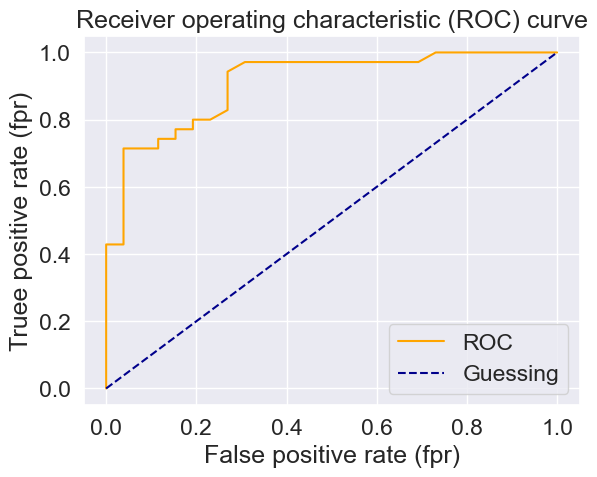

In [289]:
# Create a function plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0,1], color='darkblue', linestyle='--', label='Guessing' )
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('Truee positive rate (fpr)')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [290]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

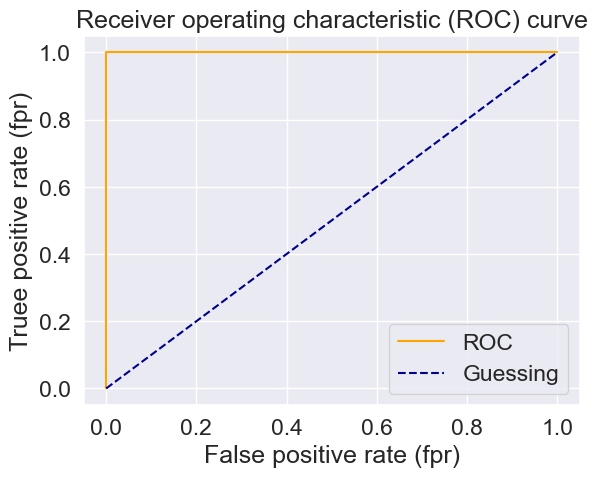

In [291]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [292]:
# Perfect AUC curve
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supossed to predict.

in essence, giving you an idea of where the model is getting confused.

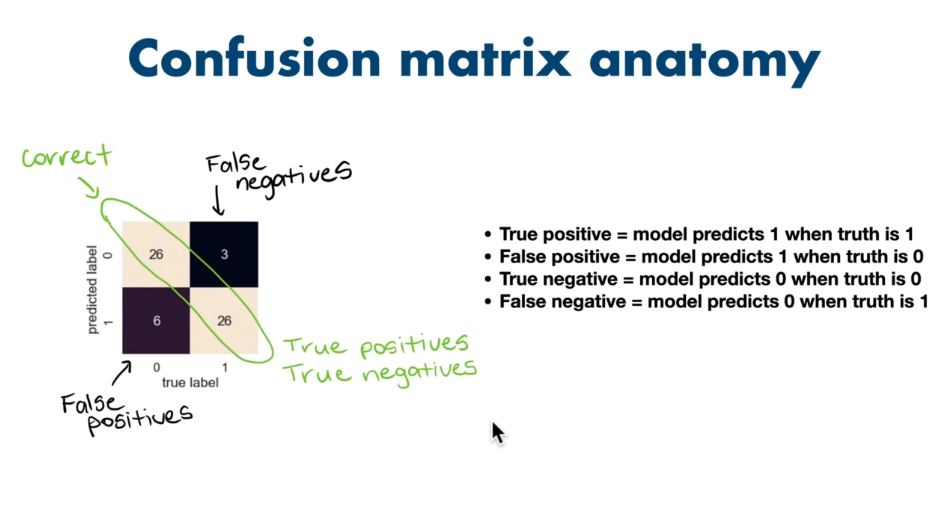

In [293]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)


array([[21,  5],
       [ 8, 27]], dtype=int64)

In [294]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual Labels,,
0,21,5
1,8,27


**Creating a confusion matrix using Scikit-Learn**

To use the new methods of creating a confusion matrix with Scikit-Learn you will need latest version

In [295]:
import sklearn
sklearn.__version__

'1.0.2'

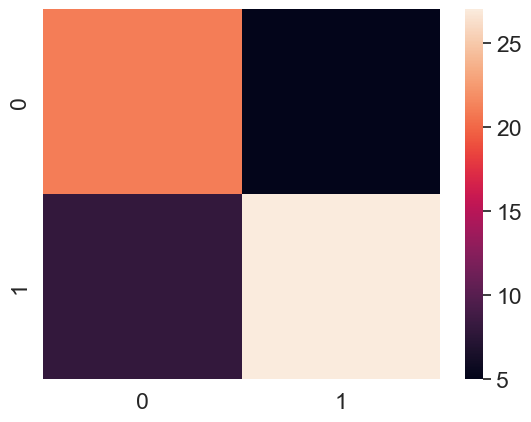

In [296]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

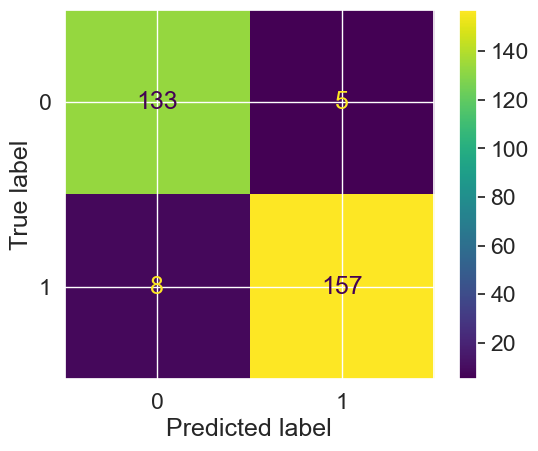

In [297]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

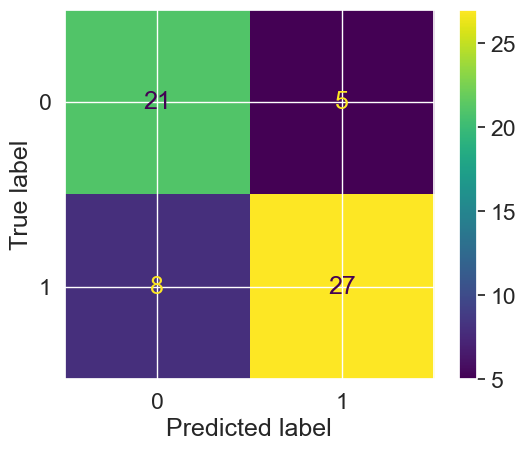

In [298]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds);

**Classification Report**

In [299]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



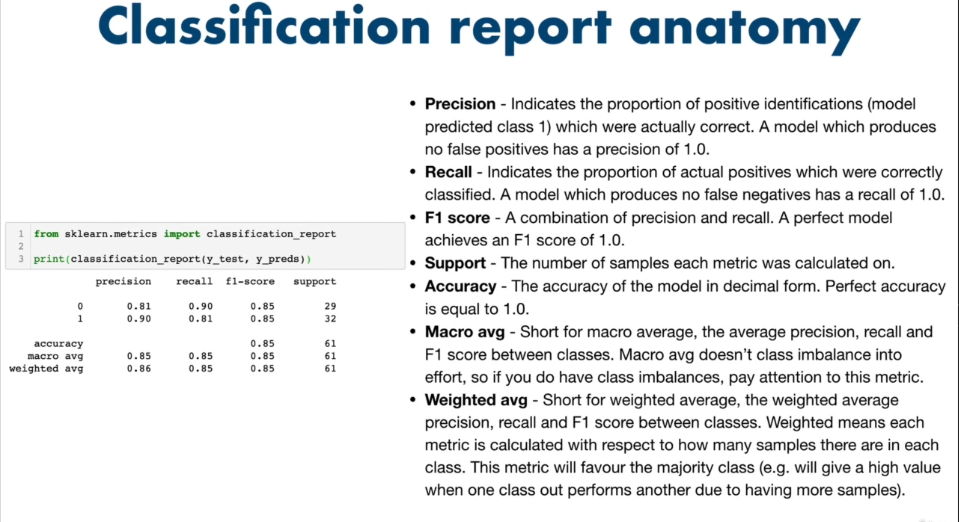

In [300]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
    
* Accuracy is a measure to start with if all classes are balanceci (e.g. same amount of samples which are labelled with O or 1).
* Precision and recall more important when classes are irnbalanced.
* If false positive are worse than false negatives, aim for higher
* If false gyedictior's are worse than false positives, aim for higher recall.
* Fl-score is a combination of precision and recall.

### 4.2.2 Regression medel evaluation metrics

model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we're going to cover are:

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to I. For
example, if all your model does is predict the mean of the targets, it's R^2 value would be O. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [301]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop('Target', axis=1)
y = housing_df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [302]:
model.score(x_test, y_test)

0.8059837014172988

In [303]:
from sklearn.metrics import r2_score

# Fill an array with y_test main
y_test_mean = np.full(len(y_test), y_test.mean())

In [304]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [305]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

**Mean absolute error (MAE)**

MAE is the average Of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [306]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32672061405038777

In [307]:
y_preds

array([0.49909  , 0.74815  , 4.9334564, ..., 4.8351584, 0.71778  ,
       1.65602  ])

In [308]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Target, Length: 4128, dtype: float64

In [309]:
0.74815 - 0.45800

0.29014999999999996

In [310]:
df = pd.DataFrame(data={"actual values" : y_test,
                        "predicted values" : y_preds})

df["differences"] = df["predicted values"] - df["actual values"]

df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.499090,0.022090
3024,0.45800,0.748150,0.290150
15663,5.00001,4.933456,-0.066554
20484,2.18600,2.569780,0.383780
9814,2.78000,2.346900,-0.433100
13311,1.58700,1.672960,0.085960
7113,1.98200,2.301510,0.319510
7668,1.57500,1.667750,0.092750
18246,3.40000,2.526490,-0.873510
5723,4.46600,4.860098,0.394098


In [311]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3267206140503876

**Mean squared error (MSE)**

MSE is the mean Of the square Of the errors between actual and predicted values.

In [312]:
# Meam squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542406995878388

In [313]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.499090,0.022090,0.000488
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [314]:
# Calculate MSe BY HAND
squared = np.square(df["differences"])
squared.mean()

0.2542406995878385

In [315]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [316]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.499090,0.022090,16.000000
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [317]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2581165503707599

In [318]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.499090,0.022090,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.209870,-0.423130,0.179039
16623,2.66800,1.938190,-0.729810,0.532623
18086,5.00001,4.835158,-0.164852,0.027176
2144,0.72300,0.717780,-0.005220,0.000027


In [319]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.7342466472912572

  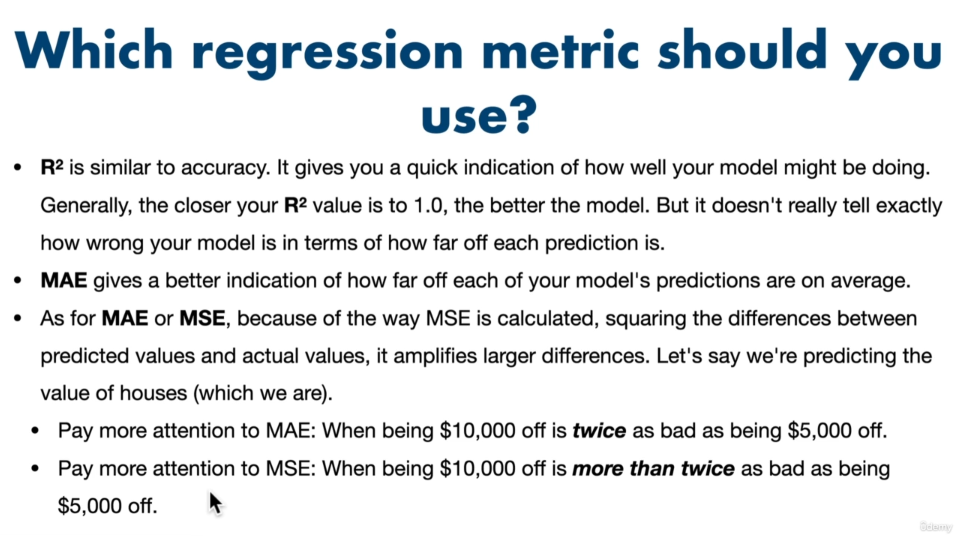

### 4.2.3 Finally using the `scoring` parameter

In [320]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [321]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, x, y, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [322]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is : 82.48%


In [323]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [324]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is : 82.48%


In [325]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [326]:
# Cross-validated precision
print(f"The cross-validated precision is : {np.mean(cv_precision)}")

The cross-validated precision is : 0.8329547346025924


In [327]:
# Recll
np.random.seed(42)
cv_recall= cross_val_score(clf, x, y, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [328]:
# Cross-validated recall
print(f"The cross-validated recall is : {np.mean(cv_recall)}")

The cross-validated recall is : 0.8545454545454545


Let's see the `scoring` parameter being using for a regression problem..

In [329]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("Target", axis=1)
y= housing_df["Target"]

model = RandomForestRegressor()

In [330]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.653726846238643

In [331]:
# Mean squared error
cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4303257834045092

In [332]:
cv_mse

array([-0.52497181, -0.34807246, -0.37397628, -0.44122708, -0.46338128])

In [333]:
# mean absolute error
cv_mae = cross_val_score(model, x,y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4664908631250001

In [334]:
cv_mae

array([-0.54332557, -0.4101009 , -0.43840433, -0.46642457, -0.47419896])

## 4.3 Using different evaluation metrics as Scikit-learn functions

The 3rd way to evaluate scikit-leam machine leaming models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [335]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create model
clf = RandomForestClassifier()

# Fit model
clf.fit(x_train, y_train)

# Make predictions
y_preds = clf.predict(x_test)

# Evaluate model using evaluation function
print("Classifier metrics on the test set")
print(f"Accuracy : {accuracy_score(y_test, y_preds)}")
print(f"Precision : {precision_score(y_test, y_preds)}")
print(f"Recall : {recall_score(y_test, y_preds)}")
print(f"F1 : {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy : 0.8524590163934426
Precision : 0.8484848484848485
Recall : 0.875
F1 : 0.8615384615384615


In [336]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create model
model = RandomForestRegressor()

# Fit model
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

# Evaluate model using evaluation function
print("Regression metrics on the test set")
print(f"R2 score : {r2_score(y_test, y_preds)}")
print(f"MAE:{mean_absolute_error(y_test, y_preds)}")
print(f"MSE:{mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score : 0.5106393318965518
MAE:0.23754098360655734
MSE:0.12204426229508197


## 5. Improving the model

First predictions — baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters :
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [337]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [338]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

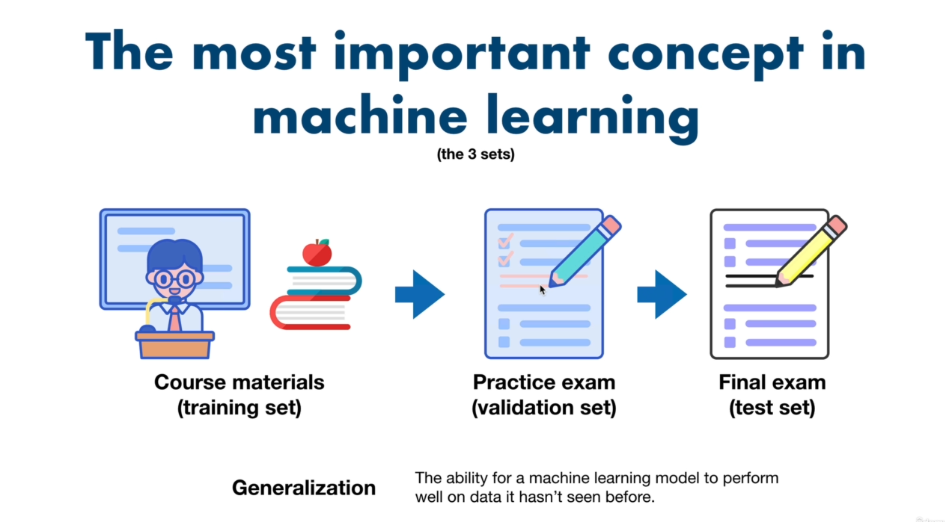

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

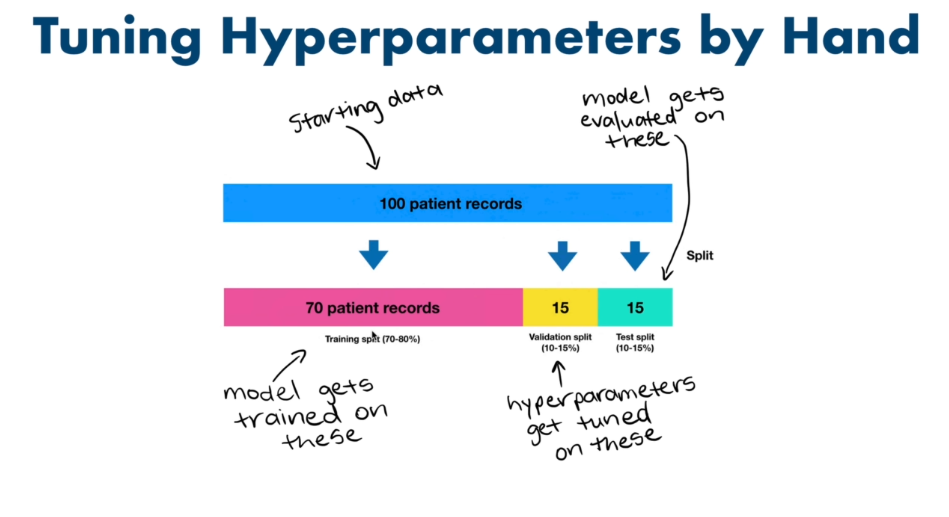

In [346]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_peds lables 
    on a classification.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [347]:
from sklearn.ensemble import RandomForestClassifier
    
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x and y
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into training and test set
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
x_train , y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split : valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

# len(x_train), len(x_valid), len(x_test) # to check split
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predicions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [350]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evalute the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Precision: 0.81
Recall: 0.84
F1 score: 0.82


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [357]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomforestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=50, #number of models to try
                            verbose = 2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samp

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None,

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [358]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [359]:
# Make predictions with the best hyperparameters
rs_y_preds= rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.76
Recall: 0.89
F1 score: 0.82


## 5.3 Hyperparameter tuning with GridSearchCV

In [360]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [361]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [5],
          'max_features': ['auto','sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [368]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomforestClassifier
# clf = RandomForestClassifier(n_jobs=1)

# # Setup GridSearchCV
# gs_clf = GridSearchCV(estimator=clf,
#                       param_grid=grid_2,
#                       verbose = 2)

# # fit the GridSearchCV version of clf
# gs_clf.fit(x_train, y_train)

In [363]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [364]:
gs_y_preds = gs_clf.predict(x_test)

# evaluate the predictioms
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


### Let's compare our diffrent models metrics

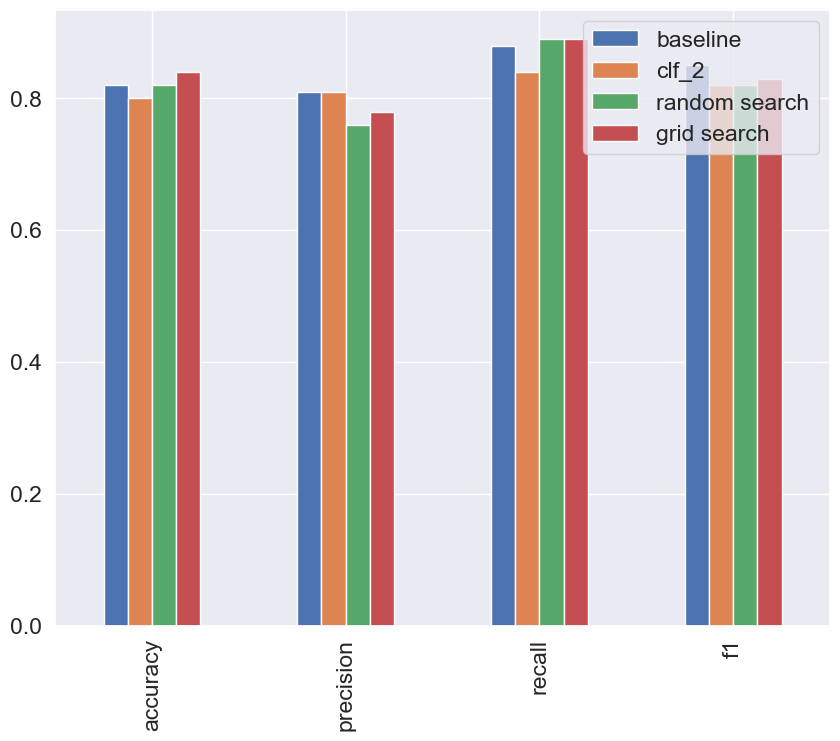

In [365]:
 compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                 "clf_2": clf_2_metrics,
                                 "random search": rs_metrics,
                                 "grid search": gs_metrics})
    
compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickles` module
2. With the `joblib` module

**Pickle**

In [366]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))


In [367]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [369]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

**Joblib**

In [370]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [373]:
# import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [374]:
# Make and eveluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## 7. putting it all together!

In [376]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [377]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [378]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

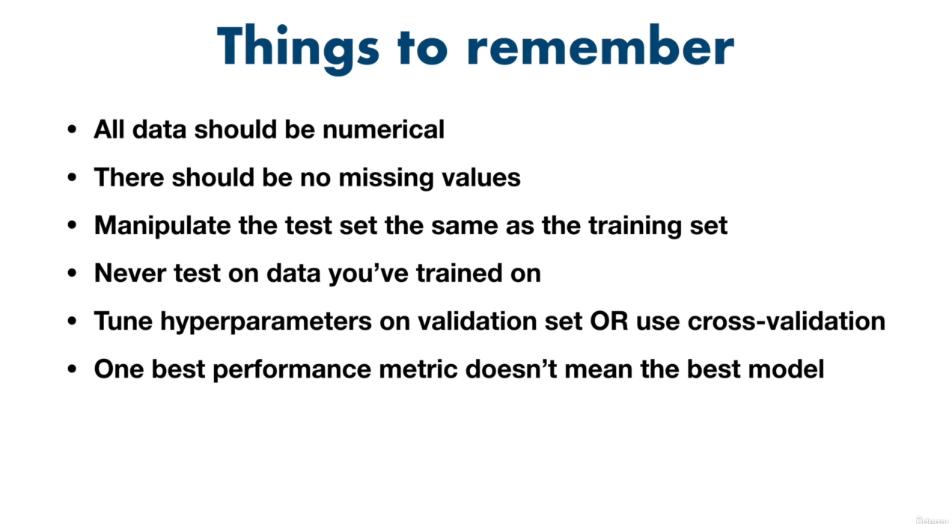

Steps we want to do (all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [388]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_feature)
                    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
x = data.drop("Price", axis = 1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875